# Genius Lyrical Sentiment Processing & Analysis

Creating a reduced dataframe with just artist, title, and lyrics.

In [1]:
#title,genius_genre,artist,year,lyrics,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_genre_list
import pandas as pd
totalcols=['title','genius_genre','artist','year','lyrics','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','spotify_genre_list']
finalcols=['title','artist','lyrics']

songs_init = pd.read_csv("..\data\compressed\lyrics_spotify_features.csv", usecols=totalcols)
#songs_init.head

songs_final=songs_init.drop(['genius_genre','year','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','spotify_genre_list'],axis=1)
songs_final.head

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pegue\AppData\Local\Temp\ipykernel_15572\2478025184.py:6: SyntaxWarning: invalid escape sequence '\d'
  songs_init = pd.read_csv("..\data\compressed\lyrics_spotify_features.csv", usecols=totalcols)


<bound method NDFrame.head of                     title            artist  \
0              Can I Live             JAY-Z   
1        Money On My Mind         Lil Wayne   
2              Mr. Carter         Lil Wayne   
3              C.R.E.A.M.      Wu-Tang Clan   
4             Barry Bonds        Kanye West   
...                   ...               ...   
27615       Turn the Page         Bob Seger   
27616      One Minute Man     Missy Elliott   
27617         Purple Rain     Potter Payper   
27618                 End       Frank Ocean   
27619  Send in the Clowns  Stephen Sondheim   

                                                  lyrics  
0      [Produced by Irv Gotti] [Intro] Yeah, hah, yea...  
1      [Intro] Yeah Money on my mind, money on my min...  
2      [Produced by Infamous and Drew Correa] [Intro:...  
3      [Produced by RZA] [Intro: Raekwon & Method Man...  
4      [Verse 1: Kanye West] It's what you all been w...  
...                                                

Applying sentiment analysis to all of the the song lyrics and adding this as another column.

In [ ]:
!pip install nrclex
!python -m textblob.download_corpora
from nrclex import NRCLex

songs_final['top_emotion'] = songs_final['lyrics'].apply(lambda x: NRCLex(x).top_emotions if NRCLex(x).top_emotions else None)


In [3]:
emotions=['fear_frequency','anger_frequency','anticipation_frequency','trust_frequency','surprise_frequency','positive_frequency','negative_frequency','sadness_frequency','disgust_frequency','joy_frequency']
frequencies=pd.DataFrame(columns=emotions)
songs_final['emotion_scores'] = songs_final['lyrics'].apply(lambda x: NRCLex(x).affect_frequencies)


In [4]:
frequencies['fear_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('fear', 0))
frequencies['anger_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('anger', 0))
frequencies['anticipation_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('anticipation', 0))
frequencies['trust_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('trust', 0))
frequencies['suprise_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('surprise', 0))
frequencies['positive_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('positive', 0))
frequencies['negative_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('negative', 0))
frequencies['sadness_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('sadness', 0))
frequencies['disgust_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('disgust', 0))
frequencies['joy_frequency'] = songs_final['emotion_scores'].apply(lambda x: x.get('joy', 0))

frequencies


,fear_frequency,anger_frequency,anticipation_frequency,trust_frequency,surprise_frequency,positive_frequency,negative_frequency,sadness_frequency,disgust_frequency,joy_frequency,suprise_frequency
0,0.085714,0.085714,0.085714,0.121429,NaN,0.207143,0.157143,0.071429,0.064286,0.064286,0.057143
1,0.041958,0.136364,0.125874,0.125874,NaN,0.153846,0.076923,0.034965,0.045455,0.139860,0.118881
2,0.128378,0.074324,0.067568,0.074324,NaN,0.108108,0.216216,0.148649,0.081081,0.027027,0.074324
3,0.064220,0.123853,0.137615,0.091743,NaN,0.169725,0.119266,0.041284,0.041284,0.114679,0.096330
4,0.080000,0.153333,0.053333,0.066667,NaN,0.186667,0.173333,0.046667,0.086667,0.126667,0.026667
...,...,...,...,...,...,...,...,...,...,...,...
27615,0.050000,0.050000,0.150000,0.125000,NaN,0.150000,0.175000,0.100000,0.025000,0.125000,0.050000
27616,0.042857,0.057143,0.214286,0.285714,NaN,0.114286,0.085714,0.014286,0.028571,0.057143,0.100000
27617,0.121053,0.105263,0.084211,0.100000,NaN,0.126316,0.184211,0.115789,0.073684,0.063158,0.026316
27618,0.000000,0.000000,0.133333,0.200000,NaN,0.266667,0.066667,0.066667,0.000000,0.200000,0.066667


In [5]:
import numpy as np

arr = songs_final['top_emotion'].to_numpy()
emotions_raw= [str(item) for item in arr]
emotion_words=[str(emotion).split(',')[0]for emotion in emotions_raw]
emotion_words=[s[2:]for s in emotion_words]
emotion_words=[s.strip("'")for s in emotion_words]
songs_final['topEmotionWord']=(emotion_words)



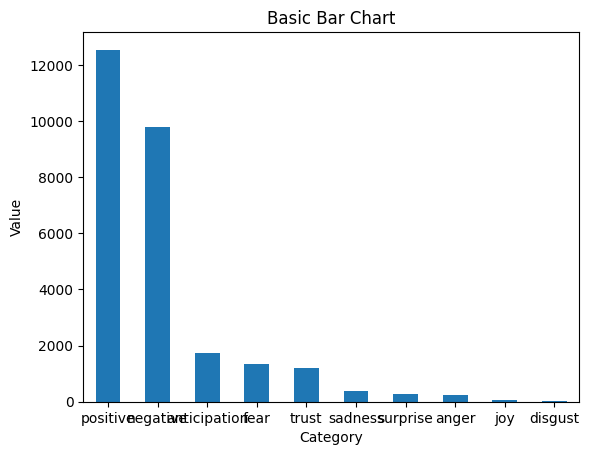

In [6]:
import matplotlib.pyplot as plt
emotion_counts=songs_final['topEmotionWord'].value_counts()

emotion_counts.plot.bar(x='Emotion', y='Count', rot=0)
plt.title('Basic Bar Chart')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()